<a href="https://colab.research.google.com/github/Lannn21/W6Datamining/blob/main/Maulana_0706022210057_Week6_ADULT_INCOME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAULANA MAHATIR-0706022210057**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Lannn21/W6Datamining/refs/heads/main/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


**VISUALISASI**

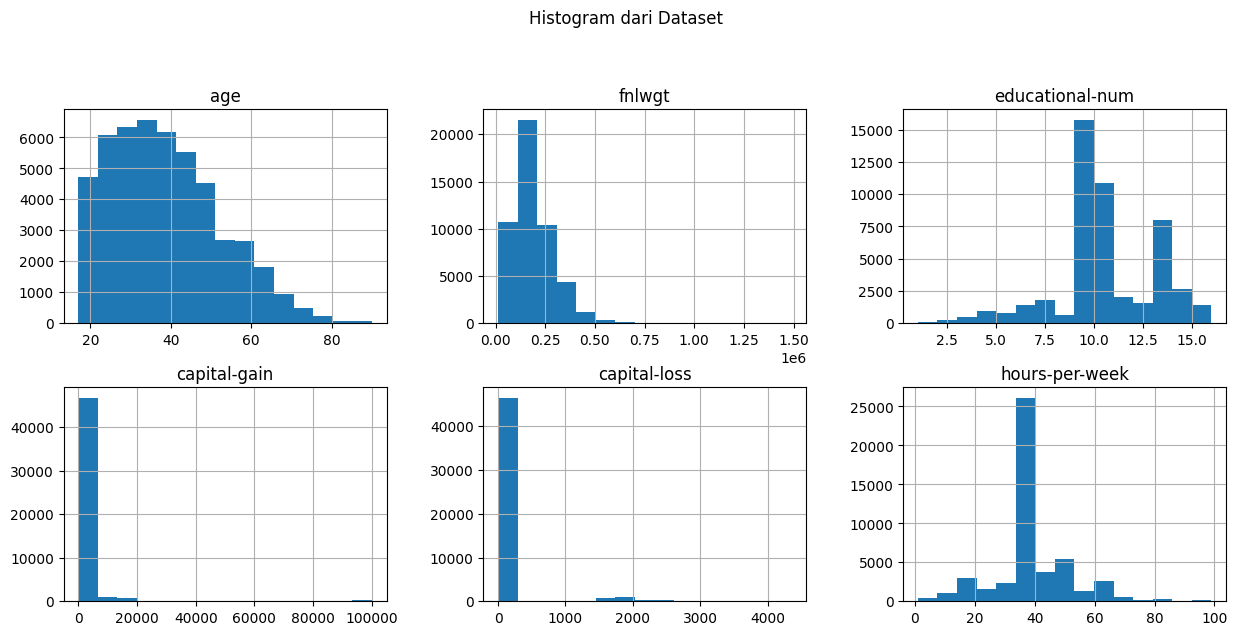

In [8]:
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Histogram dari Dataset")
plt.show()

Menampilkan histogram dari masing masing data

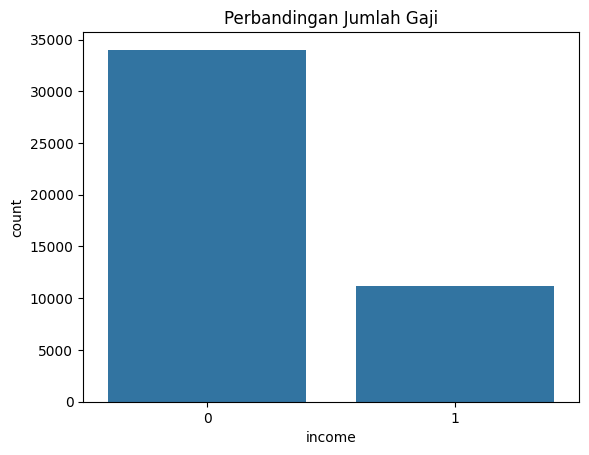

In [27]:
sns.countplot(data=df, x='income')
plt.title("Perbandingan Jumlah Gaji")
plt.show()

Menampilkan grafik perbandingan gaji dari 0: <=50.000 dan 1: >=50.000

**ENCODING DAN MENGGANTI "?" VALUE**

In [10]:
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

In [11]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


**SPLIT DATASET**

In [12]:
X = df.drop("income", axis=1)
y = df["income"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**DECISION TREE**

In [15]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [18]:
y_pred_en = clf_en.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8370


In [21]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8343
Test set score: 0.8370


[Text(0.5, 0.875, 'x[7] <= -0.574\nentropy = 0.81\nsamples = 31655\nvalue = [23773, 7882]'),
 Text(0.25, 0.625, 'x[4] <= 0.932\nentropy = 0.995\nsamples = 13014\nvalue = [7067, 5947]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 0.527\nentropy = 0.925\nsamples = 9110\nvalue = [6014, 3096]'),
 Text(0.0625, 0.125, 'entropy = 0.889\nsamples = 8660\nvalue = [6006, 2654]'),
 Text(0.1875, 0.125, 'entropy = 0.129\nsamples = 450\nvalue = [8, 442]'),
 Text(0.375, 0.375, 'x[10] <= 0.527\nentropy = 0.841\nsamples = 3904\nvalue = [1053, 2851]'),
 Text(0.3125, 0.125, 'entropy = 0.903\nsamples = 3296\nvalue = [1051, 2245]'),
 Text(0.4375, 0.125, 'entropy = 0.032\nsamples = 608\nvalue = [2, 606]'),
 Text(0.75, 0.625, 'x[10] <= 0.786\nentropy = 0.481\nsamples = 18641\nvalue = [16706.0, 1935.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 1.931\nentropy = 0.414\nsamples = 18216\nvalue = [16695, 1521]'),
 Text(0.5625, 0.125, 'entropy = 0.304\nsamples = 16852\nvalue = [

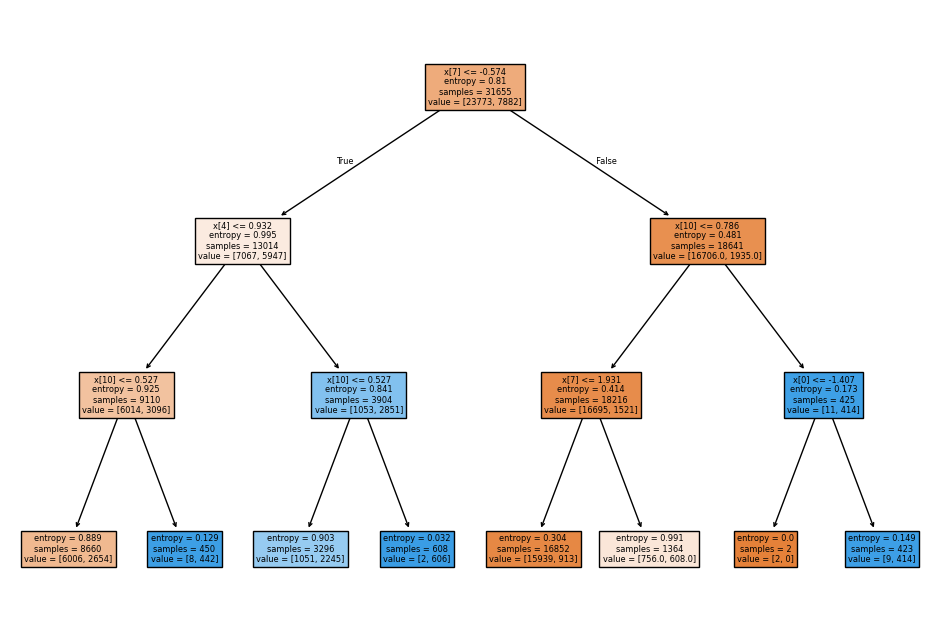

In [20]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train), filled=True)

**KNN**

In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)


In [23]:
print("K-Nearest Neighbors Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Performance
Accuracy: 0.8267855826638166
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     10241
           1       0.66      0.59      0.63      3326

    accuracy                           0.83     13567
   macro avg       0.77      0.75      0.76     13567
weighted avg       0.82      0.83      0.82     13567



**RANDOM FOREST**

In [24]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     10241
           1       0.74      0.63      0.68      3326

    accuracy                           0.85     13567
   macro avg       0.81      0.78      0.79     13567
weighted avg       0.85      0.85      0.85     13567



In [25]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.853320557234466


Dari tiga hasil tersebut bisa disimpulkan bahwa model yang menampilkan hasil paling akurat adalah Random Forest dengan tingkat akurasi 85.33% diikuti oleh Decision Tree dengan tingkat akurasi 83.70%, lalu terakhir adalah KNN dengan tingkat akurasi 82.68%. Bisa disimpulkan untuk kasus ini model analisi yang paling baik untuk digunakan adalah Random Forest.